In [1]:
from preprocessing.preprocess_pipline import final_preprocess, get_all_cleaned_data, split_profile
animes, profiles, reviews = get_all_cleaned_data()
animes, profiles, reviews = final_preprocess(animes, profiles, reviews)
train_profiles, test_profiles = split_profile(profiles, train_size=0.5, test_size=0.5)
cold_start_profiles = train_profiles[train_profiles['is_cold_start'] == True]
normal_profiles = train_profiles[train_profiles['is_cold_start'] == False]
print(f"Number of cold start profiles: {len(cold_start_profiles)}")
print(f"Number of normal profiles: {len(normal_profiles)}")

[load_anime_data] Loaded 19311 anime records.
[load_profile_data] Loaded 81727 user profiles.
[load_review_data] Loaded 192112 reviews.
[preprocessing] Processing anime data...
[preprocessing] Anime data processed successfully.
[preprocessing] Processing profile data...
[preprocessing] Profile data processed successfully.
[preprocessing] Processing review data...
[preprocessing] Review data processed successfully.
Number of cold start profiles: 26905
Number of normal profiles: 10553


In [2]:
from evaluation.evaluation_pipline import evaluation_pipeline

In [3]:
from methods.cold_start import recommend_for_cold_start_profiles
cold_start_results = recommend_for_cold_start_profiles(cold_start_profiles, 10)
print("Cold Start Recommendations Length:")
print(f"{len(cold_start_results)}")


[load_anime_data] Loaded 19311 anime records.
Cold Start Recommendations Length:
26905


In [4]:
eva_cold_start = evaluation_pipeline(cold_start_results, test_profiles, 10)
print("Cold Start Evaluation Results:")
print(eva_cold_start["overall"])

Cold Start Evaluation Results:
{'precision': 0.028466827727188258, 'ndcg': 0.12989095797019154, 'recall': 0.10892027504181379}


In [5]:
from methods.content_based import ContentBasedRecommender, content_based_recommend
content_based_recommender = ContentBasedRecommender(animes)
content_based_results = content_based_recommend(content_based_recommender, animes, normal_profiles)
print("Content-Based Recommendations Length:")
print(f"{len(content_based_results)}")
eva_content_based = evaluation_pipeline(content_based_results, test_profiles, 10)
print("Content-Based Evaluation Results:")
print(eva_content_based["overall"])

Successfully built a unified Content-Based Recommender.


Generating Content_based recommendations: 100%|██████████| 10553/10553 [06:00<00:00, 29.29it/s]


Content-Based Recommendations Length:
10553
Content-Based Evaluation Results:
{'precision': 0.050383777124988156, 'ndcg': 0.173988090271928, 'recall': 0.10262007042306484}


In [6]:
from methods.collaborative_item_based import collaborative_recommend as CF_cosine
collaborative_item_based_results = CF_cosine(normal_profiles, 10)
print("Collaborative cosine Recommendations Length:")
print(f"{len(collaborative_item_based_results)}")

Processing users: 100%|██████████| 10553/10553 [00:10<00:00, 1024.61it/s]

Collaborative cosine Recommendations Length:
10553


In [7]:
eva_CF_cosine = evaluation_pipeline(collaborative_item_based_results, test_profiles, 10)
print("Collaborative cosine Evaluation Results:")
print(eva_CF_cosine["overall"])

Collaborative cosine Evaluation Results:
{'precision': 0.06198880480838218, 'ndcg': 0.23948902696544835, 'recall': 0.12559006767051872}


In [8]:
from methods.collaborative_jaccard import collaborative_recommend as CF_jaccard
collaborative_jaccard_results = CF_jaccard(normal_profiles, 10)
print("Collaborative Jaccard Recommendations Length:")
print(f"{len(collaborative_jaccard_results)}")

Processing users: 100%|██████████| 10553/10553 [03:09<00:00, 55.81it/s]

Collaborative Jaccard Recommendations Length:
10553


In [9]:
eva_CF_jaccard = evaluation_pipeline(collaborative_jaccard_results, test_profiles, 10)
print("Collaborative Jaccard Evaluation Results:")
print(eva_CF_jaccard["overall"])

Collaborative Jaccard Evaluation Results:
{'precision': 0.06681512366151805, 'ndcg': 0.25261141523981057, 'recall': 0.13551002573555404}


In [10]:
from methods.collaborative_knn import collaborative_recommend as CF_knn
CF_knn_results = CF_knn(normal_profiles, 10)
print("CF KNN Recommendations:")
print(f"{len(CF_knn_results)}")

Processing users: 100%|██████████| 10553/10553 [00:15<00:00, 695.01it/s]

CF KNN Recommendations:
10553


In [11]:
CF_knn_eva = evaluation_pipeline(CF_knn_results, test_profiles, 10)
print("CF KNN Evaluation Results:")
print(CF_knn_eva["overall"])

CF KNN Evaluation Results:
{'precision': 0.06956315739600114, 'ndcg': 0.2755106624818761, 'recall': 0.14104508760767645}


In [12]:
from methods.CF import SVD_recommend
svd_results = SVD_recommend(normal_profiles, test_profiles, reviews, 10)
print("SVD Recommendations:")
print(f"{len(svd_results)}")

Original rating count: 192112
Training user rating count: 60100
Enhanced rating count: 88022
Cleaned rating count after conflict removal: 85533
Final SVD training set size: 85533
Generated Top-10 recommendations for 10553 users in total
SVD Recommendations:
10553


In [13]:
SVD_result = evaluation_pipeline(svd_results, test_profiles, 10)
print("SVD Evaluation Results:")
print(SVD_result["overall"])

SVD Evaluation Results:
{'precision': 0.02972614422439117, 'ndcg': 0.11791125673070604, 'recall': 0.06012636141983247}


In [14]:
from methods.weighted_hybrid import hybrid_recommendations as weighted_hybrid_recommend
hybrid_results = weighted_hybrid_recommend(animes, normal_profiles, reviews)
print("Hybrid Recommendations:")
print(f"{len(hybrid_results)}")

Processing users: 100%|██████████| 10553/10553 [00:16<00:00, 650.42it/s]


Successfully built a unified Content-Based Recommender.


Generating Content_based recommendations: 100%|██████████| 10553/10553 [06:25<00:00, 27.40it/s]


Hybrid Recommendations:
10553


In [15]:
eva_hybrid = evaluation_pipeline(hybrid_results, test_profiles, 10)
print("Hybrid Evaluation Results:")
print(eva_hybrid["overall"])

Hybrid Evaluation Results:
{'precision': 0.06348905524495405, 'ndcg': 0.24620793334438235, 'recall': 0.1289446392284448}


In [16]:
from methods.cascading_hybrid import cascading_hybrid_recommendations
cascading_results = cascading_hybrid_recommendations(animes, normal_profiles, reviews)
print("Cascading Hybrid Recommendations:")
print(f"{len(cascading_results)}")

Processing users: 100%|██████████| 10553/10553 [00:26<00:00, 404.89it/s]


Successfully built a unified Content-Based Recommender.


Generating Content_based recommendations: 100%|██████████| 10553/10553 [09:07<00:00, 19.28it/s]


Cascading Hybrid Recommendations:
10553


In [17]:
eva_cascading = evaluation_pipeline(cascading_results, test_profiles, 10)
print("Cascading Hybrid Evaluation Results:")
print(eva_cascading["overall"])

Cascading Hybrid Evaluation Results:
{'precision': 0.07042547142992514, 'ndcg': 0.2762156967716948, 'recall': 0.1429322738287014}


In [18]:
from preprocessing.preprocess_pipline import save_recommendations
best_recommendations = collaborative_results
save_recommendations(best_recommendations, out_dir="data/recommendations")
# Show 10 example recommendations from the best recommendations
count = 0
for user, recs in best_recommendations.items():
    if count >= 10:
        break
    print(f"User {user} recommendations: {recs[:10]}")  # Print top 10 recommendations for each user
    count += 1


NameError: name 'collaborative_results' is not defined

In [ ]:
# Output predictions and ground truth for high precision users in CF_KNN
print("High Precision Users - Predictions vs Ground Truth:")
print("=" * 60)
print(high_precision_users)

for i, (user, precision) in enumerate(high_precision_users[:10]):
    if user in CF_knn_results and user in test_profiles['profile'].values:
        # Get predictions
        predictions = [anime_id for anime_id, _ in CF_knn_results[user]]
        
        # Get ground truth from test_profiles
        user_test_data = test_profiles[test_profiles['profile'] == user]
        if not user_test_data.empty:
            ground_truth = user_test_data.iloc[0]['favorites_anime']
            
            print(f"\n{i+1}. User: {user} (Precision: {precision:.3f})")
            print(f"   Predictions: {predictions}")
            print(f"   Ground Truth: {ground_truth}")
            
            # Calculate overlap
            overlap = set(predictions) & set(ground_truth)
            print(f"   Overlap: {list(overlap)} (Count: {len(overlap)})")


High Precision Users - Predictions vs Ground Truth:
[('stefanminato1', 0.5), ('BearCakeHorror', 0.5), ('AllenVonStein', 0.5), ('KenzakiKazuma21', 0.5), ('chitown_biryani', 0.5), ('wolv3r1neGOD', 0.5), ('mafiahat', 0.5), ('Otherwise-six', 0.5), ('papsoshea', 0.4), ('Bintoki', 0.4), ('kiner_shah', 0.4), ('ButHesAGuy002', 0.4), ('Joy4ever', 0.4), ('KaixMaxi', 0.4), ('Lan47onymous892', 0.4), ('AwesomeAlfie27', 0.4), ('abovetheveil', 0.4), ('freizel', 0.4), ('mafd12', 0.4), ('sheroze', 0.4), ('NabilAlMuhammad', 0.4), ('HellshakeBrando', 0.4), ('St0rmblade', 0.4), ('-Zero-Requiem-', 0.4), ('Lucas_San', 0.4), ('isfak_iftu', 0.4), ('DOWA', 0.4), ('Baja25', 0.4), ('Strangeguy1998', 0.4), ('MegaJeffsta', 0.4), ('dertswa687o', 0.4), ('bluedragon239', 0.4), ('killertakedown', 0.4), ('Rima_Amano', 0.4), ('Tyrel', 0.4), ('yungpunpun', 0.4), ('FreshScones', 0.4), ('VirtuShi', 0.4), ('Davvos', 0.4), ('Zeloss', 0.4), ('nutellaCiA_TV', 0.4), ('Discord02', 0.4), ('govindanime', 0.4), ('Saightan', 0.4), (

In [44]:
# Separate users based on recall threshold from CF_knn_eva
recall_threshold = 0.2
CF_knn_eva_results = CF_knn_eva['results']

# Get recall results for all users
recall_results_knn = CF_knn_eva_results['recall']

# Separate users into two groups based on recall threshold
frequent_users_knn = []
casual_users_knn = []

for user, recall_value in recall_results_knn.items():
    if recall_value >= recall_threshold:
        frequent_users_knn.append(user)
    else:
        casual_users_knn.append(user)

print(f"Number of frequent users (recall >= {recall_threshold}): {len(frequent_users_knn)}")
print(f"Number of casual users (recall < {recall_threshold}): {len(casual_users_knn)}")

# Calculate average metrics for each group
# Frequent users
frequent_recalls_knn = [recall_results_knn[user] for user in frequent_users_knn]
frequent_ndcgs_knn = [CF_knn_eva_results['ndcg'][user] for user in frequent_users_knn]
frequent_precisions_knn = [CF_knn_eva_results['precision'][user] for user in frequent_users_knn]

avg_recall_frequent_knn = sum(frequent_recalls_knn) / len(frequent_recalls_knn) if frequent_recalls_knn else 0
avg_ndcg_frequent_knn = sum(frequent_ndcgs_knn) / len(frequent_ndcgs_knn) if frequent_ndcgs_knn else 0
avg_precision_frequent_knn = sum(frequent_precisions_knn) / len(frequent_precisions_knn) if frequent_precisions_knn else 0

# Casual users
casual_recalls_knn = [recall_results_knn[user] for user in casual_users_knn]
casual_ndcgs_knn = [CF_knn_eva_results['ndcg'][user] for user in casual_users_knn]
casual_precisions_knn = [CF_knn_eva_results['precision'][user] for user in casual_users_knn]

avg_recall_casual_knn = sum(casual_recalls_knn) / len(casual_recalls_knn) if casual_recalls_knn else 0
avg_ndcg_casual_knn = sum(casual_ndcgs_knn) / len(casual_ndcgs_knn) if casual_ndcgs_knn else 0
avg_precision_casual_knn = sum(casual_precisions_knn) / len(casual_precisions_knn) if casual_precisions_knn else 0

print(f"\nFrequent Users (recall >= {recall_threshold}):")
print(f"  Average Recall: {avg_recall_frequent_knn:.3f}")
print(f"  Average NDCG: {avg_ndcg_frequent_knn:.3f}")
print(f"  Average Precision: {avg_precision_frequent_knn:.3f}")

print(f"\nCasual Users (recall < {recall_threshold}):")
print(f"  Average Recall: {avg_recall_casual_knn:.3f}")
print(f"  Average NDCG: {avg_ndcg_casual_knn:.3f}")
print(f"  Average Precision: {avg_precision_casual_knn:.3f}")

Number of frequent users (recall >= 0.2): 5025
Number of casual users (recall < 0.2): 5528

Frequent Users (recall >= 0.2):
  Average Recall: 0.294
  Average NDCG: 0.570
  Average Precision: 0.144

Casual Users (recall < 0.2):
  Average Recall: 0.002
  Average NDCG: 0.008
  Average Precision: 0.002


CF-KNN Performance by User Favorites Count:
                 avg_recall  user_count  avg_ndcg  avg_precision
favorites_count                                                 
4                     0.137        1546     0.228          0.055
5                     0.143        8732     0.283          0.071
6                     0.099          37     0.199          0.059
7                     0.104          37     0.266          0.073
8                     0.078          24     0.255          0.062
9                     0.136          22     0.388          0.123
10                    0.106         155     0.343          0.106


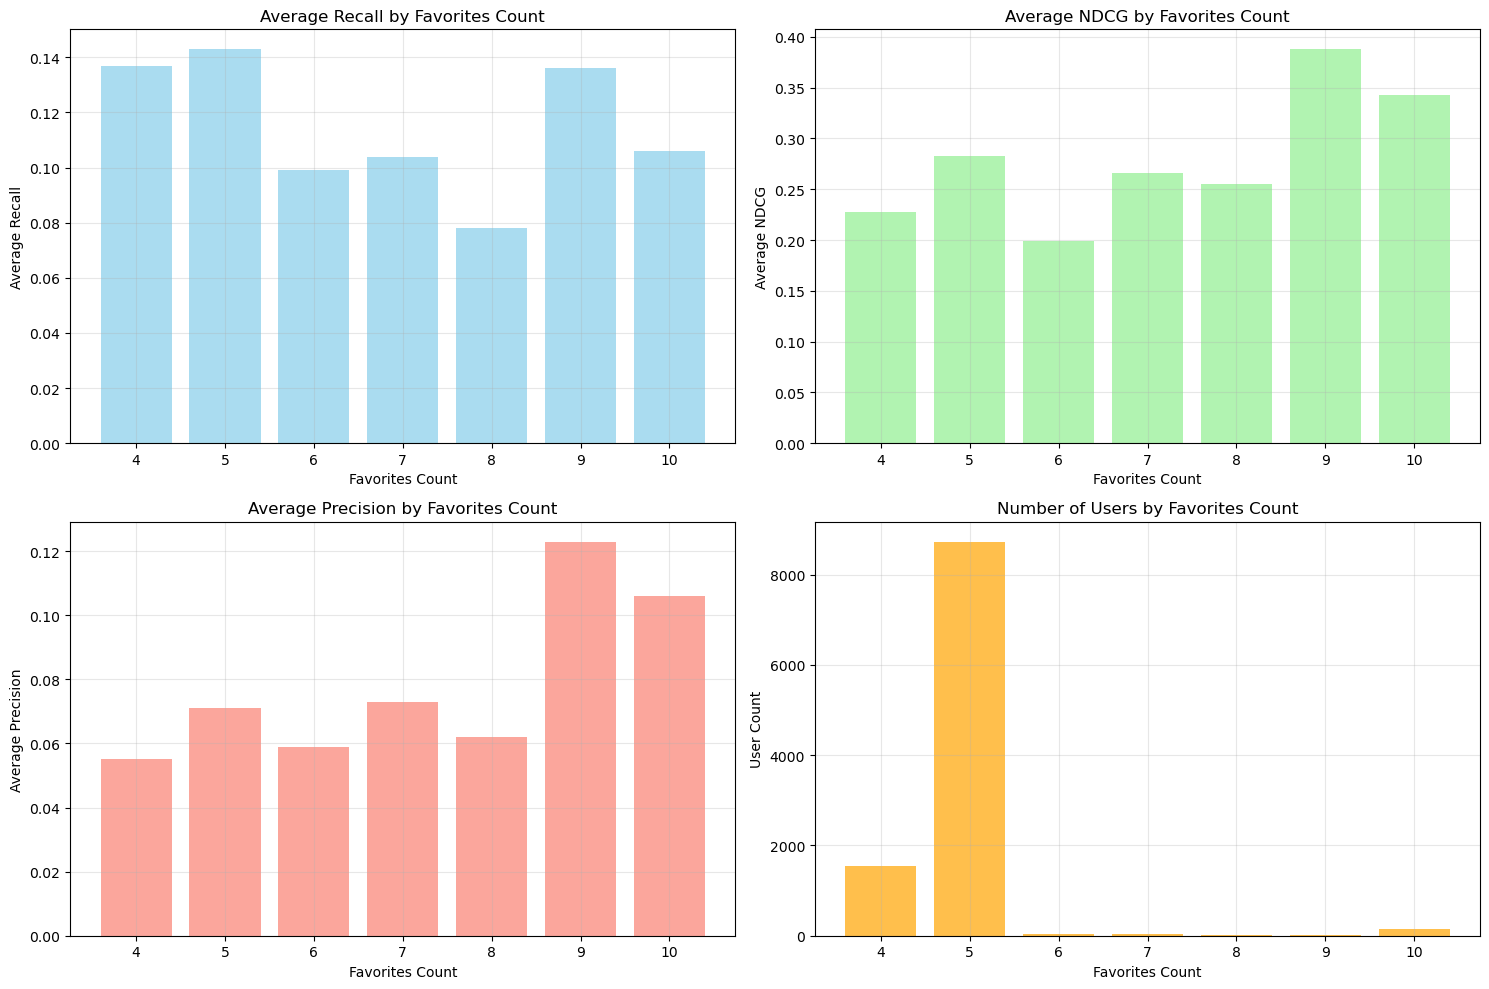


Correlation between Favorites Count and Metrics:
Recall: -0.022
NDCG: 0.049
Precision: 0.079


In [46]:
import pandas as pd

# Analyze CF_knn_eva scores by user favorites_count

# Get favorites count for each user in test_profiles
user_favorites_count = {}
for _, row in test_profiles.iterrows():
    user = row['profile']
    favorites_count = len(row['favorites_anime'])
    user_favorites_count[user] = favorites_count

# Combine CF_knn_eva results with favorites_count
analysis_data = []
for user in CF_knn_eva_results['recall'].keys():
    if user in user_favorites_count:
        analysis_data.append({
            'user': user,
            'favorites_count': user_favorites_count[user],
            'recall': CF_knn_eva_results['recall'][user],
            'ndcg': CF_knn_eva_results['ndcg'][user],
            'precision': CF_knn_eva_results['precision'][user]
        })

# Convert to DataFrame for easier analysis
analysis_df = pd.DataFrame(analysis_data)

# Group by favorites_count and calculate average metrics
grouped_stats = analysis_df.groupby('favorites_count').agg({
    'recall': ['mean', 'count'],
    'ndcg': 'mean',
    'precision': 'mean'
}).round(3)

# Flatten column names
grouped_stats.columns = ['avg_recall', 'user_count', 'avg_ndcg', 'avg_precision']

print("CF-KNN Performance by User Favorites Count:")
print("=" * 60)
print(grouped_stats)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Average Recall by Favorites Count
axes[0,0].bar(grouped_stats.index, grouped_stats['avg_recall'], alpha=0.7, color='skyblue')
axes[0,0].set_title('Average Recall by Favorites Count')
axes[0,0].set_xlabel('Favorites Count')
axes[0,0].set_ylabel('Average Recall')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Average NDCG by Favorites Count
axes[0,1].bar(grouped_stats.index, grouped_stats['avg_ndcg'], alpha=0.7, color='lightgreen')
axes[0,1].set_title('Average NDCG by Favorites Count')
axes[0,1].set_xlabel('Favorites Count')
axes[0,1].set_ylabel('Average NDCG')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Average Precision by Favorites Count
axes[1,0].bar(grouped_stats.index, grouped_stats['avg_precision'], alpha=0.7, color='salmon')
axes[1,0].set_title('Average Precision by Favorites Count')
axes[1,0].set_xlabel('Favorites Count')
axes[1,0].set_ylabel('Average Precision')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: User Count by Favorites Count
axes[1,1].bar(grouped_stats.index, grouped_stats['user_count'], alpha=0.7, color='orange')
axes[1,1].set_title('Number of Users by Favorites Count')
axes[1,1].set_xlabel('Favorites Count')
axes[1,1].set_ylabel('User Count')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation between favorites_count and metrics
correlations = analysis_df[['favorites_count', 'recall', 'ndcg', 'precision']].corr()['favorites_count']
print(f"\nCorrelation between Favorites Count and Metrics:")
print(f"Recall: {correlations['recall']:.3f}")
print(f"NDCG: {correlations['ndcg']:.3f}")
print(f"Precision: {correlations['precision']:.3f}")

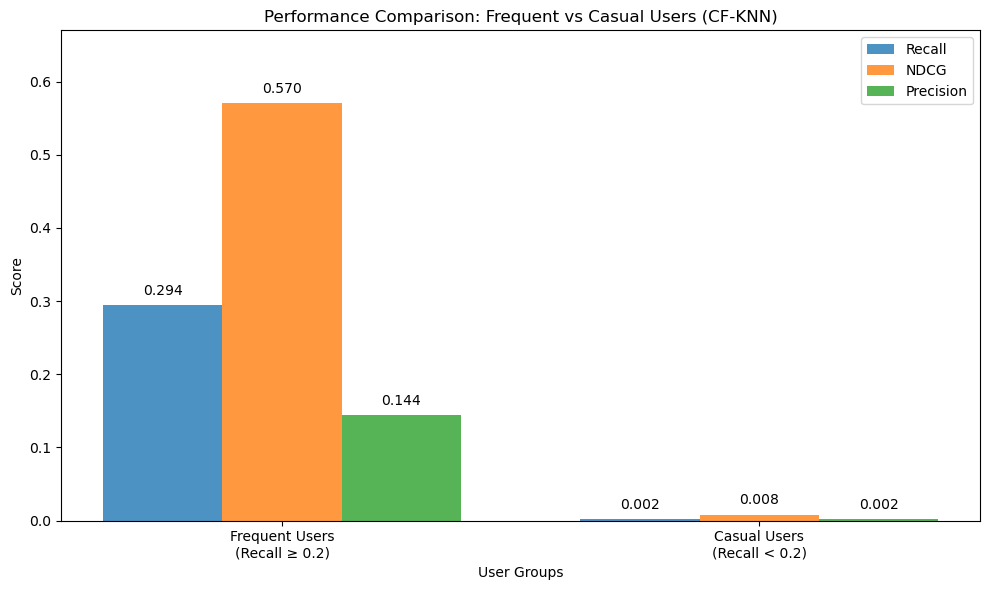

Frequent Users (5025 users):
  Recall: 0.294
  NDCG: 0.570
  Precision: 0.144

Casual Users (5528 users):
  Recall: 0.002
  NDCG: 0.008
  Precision: 0.002


In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Data for plotting
categories = ['Frequent Users', 'Casual Users']
recall_values = [avg_recall_frequent_knn, avg_recall_casual_knn]
ndcg_values = [avg_ndcg_frequent_knn, avg_ndcg_casual_knn]
precision_values = [avg_precision_frequent_knn, avg_precision_casual_knn]

x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
bars1 = ax.bar(x - width, recall_values, width, label='Recall', alpha=0.8)
bars2 = ax.bar(x, ndcg_values, width, label='NDCG', alpha=0.8)
bars3 = ax.bar(x + width, precision_values, width, label='Precision', alpha=0.8)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('User Groups')
ax.set_ylabel('Score')
ax.set_title('Performance Comparison: Frequent vs Casual Users (CF-KNN)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, max(max(recall_values), max(ndcg_values), max(precision_values)) + 0.1)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Frequent Users ({len(frequent_users_knn)} users):")
print(f"  Recall: {avg_recall_frequent_knn:.3f}")
print(f"  NDCG: {avg_ndcg_frequent_knn:.3f}")
print(f"  Precision: {avg_precision_frequent_knn:.3f}")

print(f"\nCasual Users ({len(casual_users_knn)} users):")
print(f"  Recall: {avg_recall_casual_knn:.3f}")
print(f"  NDCG: {avg_ndcg_casual_knn:.3f}")
print(f"  Precision: {avg_precision_casual_knn:.3f}")